In [ ]:
'''
--> For decision-making, we need to find the features that cause the outcome.
--> Moreover, we need to find how the outcome would change if these features are changed. 
--> Causation thus can be defined as A causes B only if changes in A particularly causes changes B.

'''

In [ ]:
'''
Objective:
   Can you determine whether the treatment causes the outcome, or the correlation is purely due to another common cause? 
'''

In [ ]:
'''
https://www.kaggle.com/datasets/tejashvi14/engineering-placements-prediction
'''

In [115]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from dowhy import gcm, CausalModel
import numpy as np
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [ ]:
'''
DoWhy estimates the causal effect of a (pre-specified) treatment variable on a (pre-specified) outcome variable.

'''

In [98]:
df = pd.read_csv('/Users/jaydeepchakraborty/JC/git-projects/model_util/DataSets/Clg_Placement/CollegePlacement.csv')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [100]:
df.head(3)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1


In [101]:
unk_stream = df['Stream'].unique()
le_stream = LabelEncoder()
df['Stream'] = le_stream.fit_transform(df['Stream'].astype(str))
unk_stream_id = df['Stream'].unique()
print(unk_stream)
print(unk_stream_id)
print(list(le_stream.inverse_transform(unk_stream_id)))

['Electronics And Communication' 'Computer Science'
 'Information Technology' 'Mechanical' 'Electrical' 'Civil']
[3 1 4 5 2 0]
['Electronics And Communication', 'Computer Science', 'Information Technology', 'Mechanical', 'Electrical', 'Civil']


In [102]:
df.head(3)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,3,1,8,1,1,1
1,21,Female,1,0,7,1,1,1
2,22,Female,4,1,6,0,0,1


In [103]:
unk_gender = df['Gender'].unique()
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'].astype(str))
unk_gender_id = df['Gender'].unique()
print(unk_gender)
print(unk_gender_id)
print(list(le_gender.inverse_transform(unk_gender_id)))

['Male' 'Female']
[1 0]
['Male', 'Female']


In [104]:
df.head(3)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1


## STEP_1: Modeling

THere are two ways this step can be done. <br>
1) Provide a causal graph in either gml or dot format. Can be a text file or a string. <br>
2) Instead of the graph, provide variable names that correspond to relevant categories, <br>
such as common causes, instrumental variables etc. <br>
<br>
According to dowhy documentation providing causal graph is recommended.

### STEP_1.a: Modeling with causal graph

In [105]:
'''
1) From the features list down all the assumtions.
2) From the assumtions generate the causal graph.
To create a causal graph dagitty [http://dagitty.net/dags.html#] tool will help. [not needed , follow syntax]
'''

'\n1) From the features list down all the assumtions.\n2) From the assumtions generate the causal graph.\nTo create a causal graph dagitty [http://dagitty.net/dags.html#] tool will help. [not needed , follow syntax]\n'

--> Assumptions
1) "Internships" directly effects "PlacedOrNot".
2) "CGPA" directly effects "PlacedOrNot".
3) "Stream" will effect both "Internships" and "CGPA".
4) "HistoryOfBacklogs" will effect "CGPA" and "Internships".
5) "Hostel" will effect on "CGPA"
6) "Age" will effect "HistoryOfBacklogs" and "Internships".
7) "Gender" will effect on "Stream"

In [106]:
causal_graph = """digraph{
Age[label="age"];
Gender[label="gender"];
Stream[label="stream"];
Internships[label="internship"];
CGPA[label="CGPA"];
Hostel[label="hostel"];
HistoryOfBacklogs[label="backlogs"];
PlacedOrNot[label="palced?"];
Internships->PlacedOrNot;
CGPA->PlacedOrNot;
Stream->Internships;
Stream->CGPA;
HistoryOfBacklogs->CGPA;
HistoryOfBacklogs->Internships;
Hostel->CGPA;
Age->HistoryOfBacklogs;
Age->Internships;
Gender->Stream;
}"""

In [107]:
model=CausalModel(
        data = df,
        treatment=["Stream"],
        outcome=["PlacedOrNot"],
        graph=causal_graph.replace("\n"," ")
        )

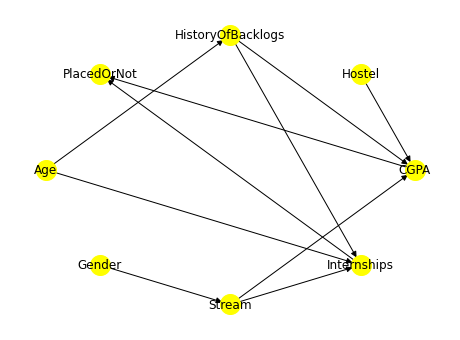

In [108]:
model.view_model(layout="dot")

### STEP_1.b: Modeling with variables

In [29]:
# '''
# Confounders (common_causes): These are variables that cause both the action and the outcome. As a result, any observed correlation between 
# the action and the outcome may simply be due to the confounder variables, and not due to any causal relationship from the action to the outcome.

# Instrumental Variables (instruments): These are special variables that cause the action, but do not directly affect the outcome. 
# In addition, they are not affected by any variable that affects the outcome. Instrumental variables can help reduce bias, if used in the correct way.

# effect_modifiers: names of variables that can modify the treatment effect. 

# '''
# model=CausalModel(
#         data = df,
#         treatment=["Stream"],
#         outcome=["PlacedOrNot"],
#         common_causes=['Gender', "HistoryOfBacklogs", "Internships", "CGPA", "Hostel"],
#         instruments=None,
#         effect_modifiers=None,
#         )

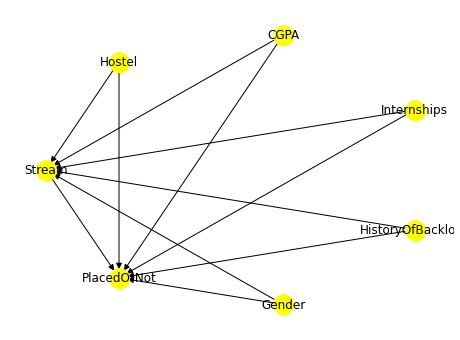

In [30]:
# model.view_model(layout="dot")
# # from IPython.display import Image, display
# # display(Image(filename="causal_model.png"))

## STEP_2: Identification

In [ ]:
'''
--> Treatment causes Outcome if changing Treatment leads to a change in Outcome keeping everything else constant.
--> Keeping everything else constant can be thought by imagining a Counterfactual World.
--> In the factual world the treatment was provided whereas in the Counterfactual world it wasn’t. 
--> Thus any change in Outcome that we might be observing would be solely due to the Treatment.
--> In this step,
Given a causal graph and a target quantity (e.g., effect of T on Y), the process of identifcation is to check whether 
the target quantity can be estimated given the observed variables.
'''

<b>Back-door criterion:</b> <br>
If all common causes of the action A and the outcome Y are observed, then the backdoor criterion implies that the causal effect <br>
can be identified by conditioning on all the common causes.

$
\begin{align}
& E[Y|do(T=t)] = E_{W}E[Y|T=t, W=w] \\
& T = \text{Treatment} \\
& Y = \text{outcome} \\
& W = \text{set of common causes or confounders}
\end{align}
$

<br>
<b>Front-door criterion: </b> <br>
TODO
<b>Instrumental Variables: </b> <br>
[These are special variables that cause the action, but do not directly affect the outcome.] <br>
If there is an instrumental variable available, then we can estimate effect even when any (or none) of the common causes of action and outcome are unobserved. <br>
The IV identification utilizes the fact that the instrument only affects the action directly, so the effect of the instrument on the outcome can be broken up <br>
into two sequential parts: the effect of the instrument on the action and the effect of the action on the treatment. <br>

It then relies on estimating the effect of the instrument on the action and the outcome to estimate the effect of the action on the outcome. <br>
For a binary instrument, the effect estimate is given by, <br>

$
\begin{align}
& E[Y|do(T=1)] - E[Y|do(T=0)] = \frac{E[Y|Z=1]-E[Y|Z=0]}{E[T|Z=1]-E[T|Z=0]} \\
& T = \text{Treatment} \\
& Y = \text{outcome} \\
& Z = \text{Instrumental Variable}
\end{align}
$

<b>Mediation (Direct and indirect effect identification): </b> <br>
TODO

In [112]:
'''
If there is a warning asks you if there are any unobserved confounders that are missing in this dataset. If there are, 
then ignoring them will lead to an incorrect estimate. If you want to disable the warning, 
you can use proceed_when_unidentifiable=True as an additional parameter to identify_effect
'''
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                    
─────────(E[PlacedOrNot])
d[Stream]                
Estimand assumption 1, Unconfoundedness: If U→{Stream} and U→PlacedOrNot then P(PlacedOrNot|Stream,,U) = P(PlacedOrNot|Stream,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                            -1⎤
 ⎢    d                  ⎛    d              ⎞  ⎥
E⎢─────────(PlacedOrNot)⋅⎜─────────([Stream])⎟  ⎥
 ⎣d[Gender]              ⎝d[Gender]          ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→PlacedOrNot then ¬(U →→{Gender})
Estimand assumption 2, Exclusion: If we remove {Gender}→{Stream}, then ¬({Gender}→PlacedOrNot)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## STEP_3: Estimation

In [ ]:
'''

The estimation step involves building a statistical estimator that can compute the target estimand identified in the previous step.

--> DoWhy use different methods for estimating the causal effect of a (pre-specified)treatment variable on a (pre-specified) outcome variable.
[https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/dowhy_estimation_methods.ipynb] 

--> 
The control group receives either no treatment, a standard treatment whose effect is already known, or a placebo (a fake treatment to control for placebo effect).
The treatment group (also called the experimental group) receives the treatment whose effect the researcher is interested in. 

ATE = Average Treatment Effect
ATT = Average Treatment Effect on Treated (i.e. those who were assigned to different stream)
ATC = Average Treatment Effect on Control (i.e. those who were assigned to different stream)

-->
Depending on the dataset properties, different estimation methods can be used
[All these estmation methods can be called through DoWhy and EconML library]

>> Simple Conditioning
• Matching
• Stratification
>> Propensity Score-Based [Rubin 1983]
• Propensity Matching
• Inverse Propensity Weighting
>> Synthetic Control [Abadie et al.]
>> Outcome-based
• Double ML [Chernozhukov et al. 2016]
• T-learner
• X-learner [Kunzel et al. 2017]
>> Loss-Based
• R-learner [Nie & Wager 2017]
>> Threshold-based
• Difference-in-differences

Methods based on estimating the treatment assignment
    Propensity-based Stratification
    Propensity Score Matching
    Inverse Propensity Weighting
Methods based on estimating the outcome model
    Linear Regression
    Generalized Linear Models
Methods based on the instrumental variable equation
    Binary Instrument/Wald Estimator
    Two-stage least squares
    Regression discontinuity
Methods for front-door criterion and general mediation
    Two-stage linear regression

'''

#### STEP_3.a: Estimation using "linear regression"

In [114]:
estimate = model.estimate_effect(identified_estimand, 
                                 method_name="backdoor.linear_regression",
                                target_units="ate")
print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['HistoryOfBacklogs', 'Hostel', 'Age']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                    
─────────(E[PlacedOrNot])
d[Stream]                
Estimand assumption 1, Unconfoundedness: If U→{Stream} and U→PlacedOrNot then P(PlacedOrNot|Stream,,U) = P(PlacedOrNot|Stream,)

## Realized estimand
b: PlacedOrNot~Stream+Stream*HistoryOfBacklogs+Stream*Hostel+Stream*Age
Target units: ate

## Estimate
Mean value: 0.00657070905318724
### Conditional Estimates
__categorical__HistoryOfBacklogs  __categorical__Hostel  __categorical__Age
(-0.001, 1.0]                     (-0.001, 1.0]          (18.999, 21.0]        0.003773
                                                         (21.0, 22

Explanation:- <br>
The average causal effect is about 0.0065. This can be interpreted as, having a change in stream changes your probability of placement by 0.65%. 

#### STEP_3.b: Estimation using "Distance Matching"

In [ ]:
'''
# Distance Matching method is applicable only for binary treatments
'''

In [84]:
# estimate = model.estimate_effect(identified_estimand, 
#                                  method_name="backdoor.distance_matching",
#                                 target_units="ate",
#                                 method_params={'distance_metric':"minkowski", 'p':2})
# print(estimate)

#### STEP_3.c: Estimation using "Propensity Score Stratification"

In [ ]:
'''
# Propensity score methods are applicable only for binary treatments
'''

In [82]:
# estimate = model.estimate_effect(identified_estimand, 
#                                  method_name="backdoor.propensity_score_stratification",
#                                 target_units="ate")
# print(estimate)

#### STEP_3.d: Estimation using "Propensity Score Matching"

In [86]:
'''
 Propensity score methods are applicable only for binary treatments
'''

'\n Propensity score methods are applicable only for binary treatments\n'

In [88]:
# estimate = model.estimate_effect(identified_estimand,
#                                               method_name="backdoor.propensity_score_matching",
#                                               target_units="ate")
# print(estimate)

#### STEP_3.e: Estimation using "Propensity Score Weighting"

In [ ]:
'''
We will be using (inverse) propensity scores to assign weights to units in the data. DoWhy supports a few different weighting schemes:

Vanilla Inverse Propensity Score weighting (IPS) (weighting_scheme="ips_weight")
Self-normalized IPS weighting (also known as the Hajek estimator) (weighting_scheme="ips_normalized_weight")
Stabilized IPS weighting (weighting_scheme = "ips_stabilized_weight")



Exception: Propensity score methods are applicable only for binary treatments
'''

In [90]:
# estimate = model.estimate_effect(identified_estimand,
#                                               method_name="backdoor.propensity_score_weighting",
#                                               target_units="ate",
#                                             method_params={"weighting_scheme":"ips_weight"})
# print(estimate)

#### STEP_3.f: Estimation using "Instrumental Variable"

In [ ]:
'''
It is possible if instrumental variable is provided.
Instrumental Variables (instruments): These are special variables that cause the action, but do not directly affect the outcome. 
'''

In [118]:
# estimate = model.estimate_effect(identified_estimand, 
#                                  method_name="iv.instrumental_variable",
#                                 method_params = {'iv_instrument_name': 'Gender'})
# print(estimate)

#### STEP_3.g: Estimation using "Regression Discontinuity"

In [119]:
# estimate = model.estimate_effect(identified_estimand, 
#                                  method_name="iv.regression_discontinuity", 
#                                  method_params={'rd_variable_name':'Gender',
#                                                 'rd_threshold_value':0.5,
#                                                 'rd_bandwidth': 0.15})
# print(estimate)

## STEP_4: Refutation

In [ ]:
'''
--> Remember that the Causal part does not come from data, rather it comes from your assumptions (Step-1) that were used to identify(Step-2) and estimate(Step-3) the cause.
--> Thus it becomes verify our assumptions and challenge their validity in more than one way if possible.
--> DoWhy offers Multiple Robustness Checks that can be used to test the validity of our assumptions.

Refutation methods provide tests that every correct estimator should pass. So if an estimator fails the refutation test (p-value is <0.05), 
then it means that there is some problem with the estimator.
'''

#### STEP_4.a: Refutation using "Random Common Cause"

In [ ]:
'''
Adds randomly drawn covariates to data and re-runs the analysis to see if the causal estimate changes or not. 
If our assumption was originally correct then there shouldn’t much variation in the causal estimate.
'''

In [117]:
refutation = model.refute_estimate(identified_estimand, 
                                   estimate, 
                                   method_name="random_common_cause")
print(refutation)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['HistoryOfBacklogs', 'Hostel', 'Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['HistoryOfBacklogs', 'Hostel', 'Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['HistoryOfBacklogs', 'Hostel', 'Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['HistoryOfBacklogs', 'Hostel', 'Age']}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_in

Explanation:- <br>
The average causal effect is about 0.0065. This can be interpreted as, having a change in stream changes your probability of placement by 0.65%. <br>
P-value is 0.86, so we can rely on the estimate.

#### STEP_4.b: Refutation using "Placebo Treatment Refuter"

In [ ]:
'''
Randomly assigns any covariate as a treatment and re-runs the analysis. 
If our assumptions were correct then this newly found out estimate should go to 0.
'''

In [96]:
# refutation = model.refute_estimate(identified_estimand, 
#                                    estimate, 
#                                    method_name="placebo_treatment_refuter",
#                                    placebo_type="permute", 
#                                    num_simulations=20)
# print(refutation)

#### STEP_4.c: Refutation using "Data Subset Refuter"

In [ ]:
'''
Creates subsets of the data(similar to cross-validation) and checks whether the causal estimates vary across subsets. 
If our assumptions were correct there shouldn’t be much variation.
'''

In [120]:
# refutation = model.refute_estimate(identified_estimand, 
#                                    estimate, 
#                                    method_name="data_subset_refuter")
# print(refutation)

# Resources
1) https://github.com/py-why/dowhy#four-steps-of-causal-inference
2) https://www.pywhy.org/dowhy/v0.9.1/example_notebooks/dowhy_simple_example.html